In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import root_mean_squared_error, r2_score, mean_squared_error, make_scorer
from sklearn.ensemble import RandomForestRegressor

### Data loading

In [2]:
# path = '/home/pc/Desktop_linux/chinu/big_mart_sales_prediction/sample_submission_8RXa3c6.csv'
# submission = pd.read_csv(path)
# submission.head()

In [3]:
df_path = '/home/pc/Desktop_linux/chinu/big_mart_sales_prediction/train_v9rqX0R.csv'
unseen_path = '/home/pc/Desktop_linux/chinu/big_mart_sales_prediction/test_AbJTz2l.csv'

In [4]:
df = pd.read_csv(df_path)
unseen_df = pd.read_csv(unseen_path)
print(df.head())
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
# print(unseen_df.head())

  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier

In [41]:
df.sort_values(by='Item_Outlet_Sales', ascending=False).head(30)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7188,NCE42,NaN,Low Fat,0.010551,Household,234.9958,OUT027,1985,Medium,Tier 3,Supermarket Type3,13086.9648
5223,FDQ19,NaN,Regular,0.014296,Fruits and Vegetables,242.6512,OUT027,1985,Medium,Tier 3,Supermarket Type3,12117.5600
1450,FDZ20,NaN,Low Fat,0.000000,Fruits and Vegetables,253.0356,OUT027,1985,Medium,Tier 3,Supermarket Type3,11445.1020
4349,FDP33,NaN,Low Fat,0.088840,Snack Foods,254.2672,OUT027,1985,Medium,Tier 3,Supermarket Type3,10993.6896
6541,FDI50,NaN,Regular,0.030693,Canned,228.0352,OUT027,1985,Medium,Tier 3,Supermarket Type3,10306.5840
4888,FDF39,14.850,Regular,0.019495,Dairy,261.2910,OUT013,1987,High,Tier 3,Supermarket Type1,10256.6490
1009,FDU14,NaN,Low Fat,0.034584,Dairy,248.3750,OUT027,1985,Medium,Tier 3,Supermarket Type3,10236.6750
7191,NCH18,NaN,Low Fat,0.044445,Household,245.2802,OUT027,1985,Medium,Tier 3,Supermarket Type3,10072.8882
4289,NCM05,6.825,Low Fat,0.059847,Health and Hygiene,262.5226,OUT046,1997,Small,Tier 1,Supermarket Type1,9779.9362
7752,FDC17,NaN,Low Fat,0.015386,Frozen Foods,208.9928,OUT027,1985,Medium,Tier 3,Supermarket Type3,9678.0688


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### Missing Values

In [6]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
unseen_df.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [8]:
df.shape, unseen_df.shape

((8523, 12), (5681, 11))

### Understand data

In [9]:
for feature in df.columns:
    print(feature)
    print(df[feature].nunique())
    print(df[feature].value_counts())
    print('*' * 40)

Item_Identifier
1559
Item_Identifier
FDW13    10
FDG33    10
FDX31     9
FDT07     9
NCY18     9
         ..
FDO33     1
FDK57     1
FDT35     1
FDN52     1
FDE52     1
Name: count, Length: 1559, dtype: int64
****************************************
Item_Weight
415
Item_Weight
12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
8.920      2
6.520      1
9.420      1
7.685      1
5.400      1
Name: count, Length: 415, dtype: int64
****************************************
Item_Fat_Content
5
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64
****************************************
Item_Visibility
7880
Item_Visibility
0.000000    526
0.076975      3
0.061271      2
0.046825      2
0.112399      2
           ... 
0.054142      1
0.018920      1
0.044974      1
0.103611      1
0.083060      1
Name: count, Length: 7880, dtype: int64
****************************************
Item_Type
16
Item_Type

### Create Item weights DF for each item

In [10]:
df_weights = df[['Item_Identifier', 'Item_Weight']].dropna(axis=0)
df_weights = df_weights.groupby(by='Item_Identifier')['Item_Weight'].apply(lambda x: x.mode().iloc[0]).reset_index()

df_weights.head()

,Item_Identifier,Item_Weight
0,DRA12,11.600
1,DRA24,19.350
2,DRA59,8.270
3,DRB01,7.390
4,DRB13,6.115


### Fill missing values for Item_Weights and Outlet_Size 

In [11]:
GROCERY_STORE_SIZE = df[df['Outlet_Type'] == 'Grocery Store']['Outlet_Size'].dropna().unique()[0]
LOCATION_TIER_2_SIZE = df[df['Outlet_Location_Type'] == 'Tier 2']['Outlet_Size'].dropna().unique()[0]


def replace_missing_values(row):
    if pd.isna(row['Item_Weight']):
        mode_val = df_weights.loc[df_weights['Item_Identifier'] == row['Item_Identifier'], 'Item_Weight'] 
        if not mode_val.empty:
            row['Item_Weight'] = mode_val.iloc[0]
        else:
            print(row['Item_Identifier'])
    
    if pd.isna(row['Outlet_Size']):
        if row['Outlet_Type'] == 'Grocery Store':
            row['Outlet_Size'] = GROCERY_STORE_SIZE
        elif row['Outlet_Location_Type'] == 'Tier 2':
            row['Outlet_Size'] = LOCATION_TIER_2_SIZE
        else:
            print('NaN is as it is !!', row['Outlet_Identifier'], row['Outlet_Location_Type'], row['Outlet_Type'])
    return row


df_clean = df.apply(replace_missing_values, axis=1)
unseen_df_clean = unseen_df.apply(replace_missing_values, axis=1)

df_clean['Item_Weight'] = df_clean['Item_Weight'].fillna(df_clean['Item_Weight'].mode().iloc[0])
unseen_df_clean['Item_Weight'] = unseen_df_clean['Item_Weight'].fillna(df_clean['Item_Weight'].mode().iloc[0])

df_clean.isna().sum()


FDN52
FDK57
FDE52
FDQ60
FDQ60


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [12]:
df_clean.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [13]:
df_clean['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

### Clean 'Item_Fat_Content' as low_fat or not (1 or 0)

In [14]:
def is_low_fat(row_val):
    my_dict = {'Low Fat' : 1,
               'Regular' : 0,
               'LF' : 1,
               'reg' : 0,
               'low fat' : 1}
    return my_dict[row_val]


df_clean['Item_Fat_Content'] = df_clean['Item_Fat_Content'].map(is_low_fat)
unseen_df_clean['Item_Fat_Content'] = unseen_df_clean['Item_Fat_Content'].map(is_low_fat)

In [15]:
df_clean.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,1,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,0,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,1,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,0,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,1,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [16]:
for feature in df.columns:
    print(feature)
    print(df[feature].nunique())
    print(df[feature].value_counts())
    print('*' * 40)

Item_Identifier
1559
Item_Identifier
FDW13    10
FDG33    10
FDX31     9
FDT07     9
NCY18     9
         ..
FDO33     1
FDK57     1
FDT35     1
FDN52     1
FDE52     1
Name: count, Length: 1559, dtype: int64
****************************************
Item_Weight
415
Item_Weight
12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
8.920      2
6.520      1
9.420      1
7.685      1
5.400      1
Name: count, Length: 415, dtype: int64
****************************************
Item_Fat_Content
5
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64
****************************************
Item_Visibility
7880
Item_Visibility
0.000000    526
0.076975      3
0.061271      2
0.046825      2
0.112399      2
           ... 
0.054142      1
0.018920      1
0.044974      1
0.103611      1
0.083060      1
Name: count, Length: 7880, dtype: int64
****************************************
Item_Type
16
Item_Type

### Target Encoding with KFOLd for 'Item_Identifier'

In [17]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
df_clean['Item_Identifier_encoded'] = np.nan

for i, (train_index, val_index) in enumerate(kf.split(df_clean)):
    train_df = df_clean.iloc[train_index].copy()  # Create copies to avoid SettingWithCopyWarning
    val_df = df_clean.iloc[val_index].copy()    # Create copies to avoid SettingWithCopyWarning

    means = train_df.groupby('Item_Identifier')['Item_Outlet_Sales'].mean().round(2)

    # The fix: Use the indices from val_df directly
    df_clean.loc[val_df.index, 'Item_Identifier_encoded'] = val_df['Item_Identifier'].map(means)


# Calculate mean for overall df_clean
means = df_clean.groupby(by='Item_Identifier')['Item_Outlet_Sales'].mean().round(2)
df_clean['Item_Identifier_encoded'] = df_clean['Item_Identifier_encoded'].fillna(df_clean['Item_Outlet_Sales'].mean().round(2))
unseen_df_clean['Item_Identifier_encoded'] = unseen_df_clean['Item_Identifier'].map(means)

### Feature engineering - Outlet_Establishment_Year


In [18]:
df_clean['Outlet_Total_Years'] = df_clean['Outlet_Establishment_Year'].apply(lambda x: int(2013 - x))
unseen_df_clean['Outlet_Total_Years'] = unseen_df_clean['Outlet_Establishment_Year'].apply(lambda x: int(2013 - x))
df_clean.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Identifier_encoded,Outlet_Total_Years
0,FDA15,9.30,1,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,5229.19,14
1,DRC01,5.92,0,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,1215.31,4
2,FDN15,17.50,1,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,1258.36,14
3,FDX07,19.20,0,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,3341.48,15
4,NCD19,8.93,1,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,585.77,26


### One hot encoding for Item_Type, Outlet_Identifier, Outlet_Size, Outlet_Location_Type, Outlet_Type    

In [19]:
dummies = pd.get_dummies(df_clean[['Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']], dtype=int)
df_clean = pd.concat([df_clean, dummies], axis=1)
df_clean = df_clean.drop(['Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Outlet_Establishment_Year'], axis=1)
df_clean.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Identifier_encoded,Outlet_Total_Years,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.30,1,0.016047,249.8092,3735.1380,5229.19,14,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0
1,DRC01,5.92,0,0.019278,48.2692,443.4228,1215.31,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
2,FDN15,17.50,1,0.016760,141.6180,2097.2700,1258.36,14,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0
3,FDX07,19.20,0,0.000000,182.0950,732.3800,3341.48,15,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0
4,NCD19,8.93,1,0.000000,53.8614,994.7052,585.77,26,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0


In [20]:
dummies = pd.get_dummies(unseen_df_clean[['Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']], dtype=int)
unseen_df_clean = pd.concat([unseen_df_clean, dummies], axis=1)
unseen_df_clean = unseen_df_clean.drop(['Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Outlet_Establishment_Year'], axis=1)
df_clean.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Identifier_encoded,Outlet_Total_Years,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.30,1,0.016047,249.8092,3735.1380,5229.19,14,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0
1,DRC01,5.92,0,0.019278,48.2692,443.4228,1215.31,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
2,FDN15,17.50,1,0.016760,141.6180,2097.2700,1258.36,14,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0
3,FDX07,19.20,0,0.000000,182.0950,732.3800,3341.48,15,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0
4,NCD19,8.93,1,0.000000,53.8614,994.7052,585.77,26,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0


### Visualization

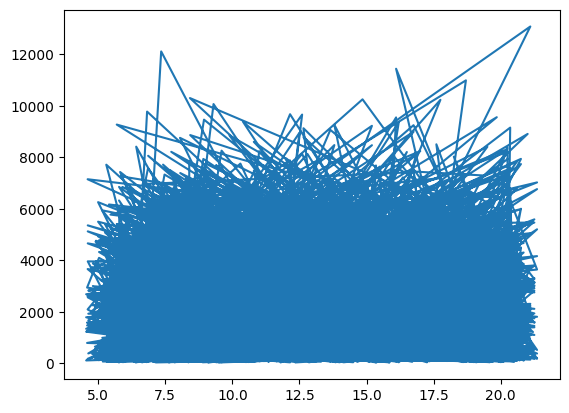

[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ........................................alpha=100.0; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=50, random_state=42; total time=   0.5s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=100, random_state=42; total time=   1.0s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=5, n_estimators=70, random_state=42; total time=   0.7s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=10, n_estimators=100, random_state=42; total time=   1.0s
[CV] END max_depth=5, min_samples_leaf=15, min_samples_split=5, n_estimators=50, random_state=42; total time=   0.5s
[CV] END max_depth=5, min_samples_leaf=15, min_samples_split=5, n_estimators=150, random_state=42; total time=   1.4s
[CV] END max_depth=7, min_samples_leaf=5, min_sample

In [37]:
# for feature in ['Item_Weight',
#  'Item_Visibility',
#  'Item_MRP',
#  'Item_Identifier_encoded',
#  'Outlet_Total_Years']:
    

plt.plot(df_clean['Item_Weight'], df_clean['Item_Outlet_Sales'])



### Correlation

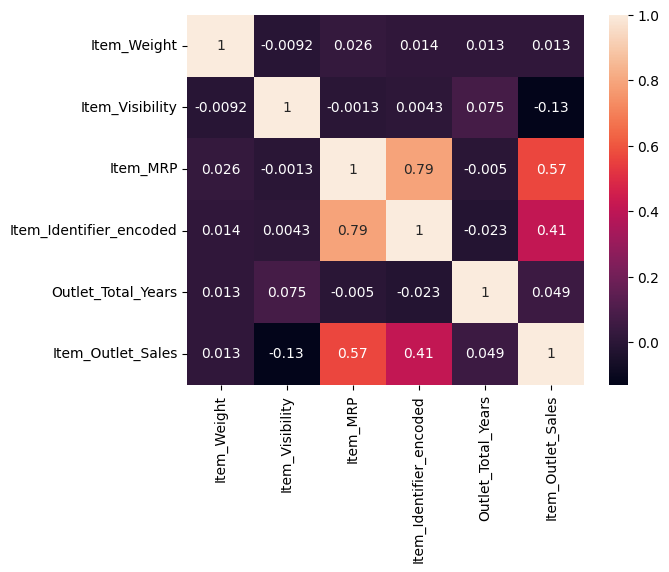

In [21]:
num_col = [ 'Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Identifier_encoded', 'Outlet_Total_Years','Item_Outlet_Sales']
plt.Figure(figsize=(10, 10))
sns.heatmap(df_clean[num_col].corr(), annot=True)
plt.show()

### Train- Test Split

In [22]:
y = df_clean['Item_Outlet_Sales']
X = df_clean.drop(['Item_Outlet_Sales', 'Item_Identifier'], axis=1)
X_unseen = unseen_df_clean.drop(['Item_Identifier'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape, X_unseen.shape

((5966, 42), (2557, 42), (5966,), (2557,), (5681, 42))

### Scalling

In [23]:
scaler = StandardScaler()
X_train[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Identifier_encoded', 'Outlet_Total_Years']] = scaler.fit_transform(X_train[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Identifier_encoded', 'Outlet_Total_Years']])
X_unseen[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Identifier_encoded', 'Outlet_Total_Years']] = scaler.transform(X_unseen[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Identifier_encoded', 'Outlet_Total_Years']])
X_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Item_Identifier_encoded,Outlet_Total_Years,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
1921,-1.131661,0,1.606681,-0.401895,-0.372582,-0.015833,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0
655,1.466114,1,-1.008442,-0.619284,-0.327420,0.103437,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0
2229,-0.941632,0,-0.227068,-0.202535,-0.581110,1.534680,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1
2537,1.379737,1,1.028038,1.290187,1.492273,-0.492914,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0
3528,1.163796,0,0.515355,0.686853,0.843735,1.296139,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0


### Model Evaluation

In [24]:
def model_evaluation(y_train, y_train_pred, y_test, y_test_pred, model='Regression'):
    print("*" * 80)
    print("*" * 30, model, '*' * 30)
    print("*" * 80)
    print('Train Data : ')
    print('RMSE = ', root_mean_squared_error(y_train, y_train_pred))
    print('R2_score = ', r2_score(y_train, y_train_pred))
    print('\n\nTest Data : ')
    print('RMSE = ', root_mean_squared_error(y_test, y_test_pred))
    print('R2_score = ', r2_score(y_test, y_test_pred))


### Linear Rgression

In [25]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [26]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
y_unseen_pred = lr.predict(X_unseen)
model_evaluation(y_train, y_train_pred, y_test, y_test_pred)

********************************************************************************
****************************** Regression ******************************
********************************************************************************
Train Data : 
RMSE =  1139.460737259293
R2_score =  0.5609807365043187


Test Data : 
RMSE =  86226.28323434986
R2_score =  -2653.405248631241


### Ridge Regularization

In [ ]:
param = {'alpha': np.logspace(-3, 3, 7)}

ridge = Ridge()


def root_mean_squared_error(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    return np.sqrt(mse)

rmse_scorer = make_scorer(root_mean_squared_error, greater_is_better=False)
grid_search = GridSearchCV(estimator=ridge,
                           param_grid=param,
                           cv=5,
                           scoring=rmse_scorer,
                           n_jobs=-1,
                           verbose=2)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
             scoring=make_scorer(root_mean_squared_error, greater_is_better=False, response_method='predict'),
             verbose=2)

In [28]:
best_estimator = grid_search.best_estimator_
y_train_pred = best_estimator.predict(X_train)
y_test_pred = best_estimator.predict(X_test)
y_unseen_pred = best_estimator.predict(X_unseen)
model_evaluation(y_train, y_train_pred, y_test, y_test_pred, best_estimator)

********************************************************************************
****************************** Ridge(alpha=np.float64(10.0)) ******************************
********************************************************************************
Train Data : 
RMSE =  1139.4927257071558
R2_score =  0.5609560867002731


Test Data : 
RMSE =  92113.41324547728
R2_score =  -3028.239738274197


### Lasso Regularization

In [ ]:
param = {'alpha': np.logspace(-3, 3, 7)}

lasso = Lasso()

def root_mean_squared_error(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    return np.sqrt(mse)


rmse_scorer = make_scorer(root_mean_squared_error, greater_is_better=False)
grid_search = GridSearchCV(estimator=lasso,
                           param_grid=param,
                           cv=5,
                           scoring=rmse_scorer,
                           n_jobs=-1,
                           verbose=2)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


/home/pc/Desktop_linux/chinu/common_kernel/virtual_env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.557e+07, tolerance: 1.401e+06
  model = cd_fast.enet_coordinate_descent(
/home/pc/Desktop_linux/chinu/common_kernel/virtual_env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.724e+07, tolerance: 1.425e+06
  model = cd_fast.enet_coordinate_descent(
/home/pc/Desktop_linux/chinu/common_kernel/virtual_env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the nu

GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
             scoring=make_scorer(root_mean_squared_error, greater_is_better=False, response_method='predict'),
             verbose=2)

### Random Forest

In [ ]:
param = {
    'n_estimators': [ 50, 70, 100, 150, 200],
    'max_depth': [5, 7, 10],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [5, 10, 15],
    'random_state': [42]
}


rf = RandomForestRegressor()

# 1. Define the RMSE function
def root_mean_squared_error(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    return np.sqrt(mse)

# 2. Create the RMSE scorer using make_scorer
rmse_scorer = make_scorer(root_mean_squared_error, greater_is_better=False) # Important!

grid_search = GridSearchCV(estimator=rf,
                           scoring=rmse_scorer,  # Use the scorer here
                           verbose=2,
                           cv=4,
                           param_grid=param,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 135 candidates, totalling 540 fits


GridSearchCV(cv=4, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 7, 10],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [5, 10, 15],
                         'n_estimators': [10, 20, 30, 50, 70],
                         'random_state': [42]},
             scoring=make_scorer(root_mean_squared_error, greater_is_better=False, response_method='predict'),
             verbose=2)

In [33]:
best_estimator = grid_search.best_estimator_
best_estimator

RandomForestRegressor(max_depth=5, min_samples_leaf=15, min_samples_split=5,
                      n_estimators=30, random_state=42)

In [34]:
y_train_pred = best_estimator.predict(X_train)
y_test_pred = best_estimator.predict(X_test)
y_unseen_pred = best_estimator.predict(X_unseen)
model_evaluation(y_train, y_train_pred, y_test, y_test_pred, 'RF')

********************************************************************************
****************************** RF ******************************
********************************************************************************
Train Data : 
RMSE =  1073.654471665787
R2_score =  0.6102250531498826


Test Data : 
RMSE =  2848.7229369475754
R2_score =  -1.8972656638503005


### Submission File

In [ ]:
path = '/home/pc/Desktop_linux/chinu/big_mart_sales_prediction/sample_submission_8RXa3c6.csv'
submission = pd.read_csv(path)
submission.head()

In [ ]:
y_unseen_pred

In [ ]:
unseen_path = '/home/pc/Desktop_linux/chinu/big_mart_sales_prediction/test_AbJTz2l.csv'
unseen_df = pd.read_csv(unseen_path)
unseen_df.head()


In [ ]:
unseen_path = '/home/pc/Desktop_linux/chinu/big_mart_sales_prediction/test_AbJTz2l.csv'
unseen_df = pd.read_csv(unseen_path)
submission_df = unseen_df[['Item_Identifier', 'Outlet_Identifier']]
submission_df['Item_Outlet_Sales'] = y_unseen_pred
submission_df.head()

In [ ]:
write_file_path = '/home/pc/Desktop_linux/chinu/big_mart_sales_prediction/submission/1st_attempt.csv'
submission_df.to_csv(write_file_path, index=False)